# Fracción de galaxias por grupo

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from collections import Counter
import numpy as np
from itertools import cycle, islice

import numpy as np
np.random.seed(0)

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../../../data/tab_gal_gru.dat'
df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs', 'pasiva', 'early' ])

# , 'g_ps', 'g_early'
## g_ps= pasiva
## g_early early

id_gc_gal_grup = df.ngc.to_list()

path = '../../../data/compact_in_all'

df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

In [4]:
type(df.ngc[0])

numpy.int64

**Lista de GCs descartandos por corte de Magnitud**

In [5]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

In [6]:
df.shape

(2012, 15)

In [7]:
df = df.reset_index()

**Visualización y Curación**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ngc     2012 non-null   int64  
 1   nk      2012 non-null   int64  
 2   alg     2012 non-null   float64
 3   delg    2012 non-null   float64
 4   zred    2012 non-null   float64
 5   rmag    2012 non-null   float64
 6   gmag    2012 non-null   float64
 7   umag    2012 non-null   float64
 8   gal_ID  2012 non-null   int64  
 9   r50     2012 non-null   float64
 10  r90     2012 non-null   float64
 11  r_abs   2012 non-null   float64
 12  g_abs   2012 non-null   float64
 13  u_abs   2012 non-null   float64
 14  pasiva  2012 non-null   int64  
 15  early   2012 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 251.6 KB


None

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,233.149602,2.817097,190.201947,27.638412,0.043493,15.373400,16.135362,19.211730,1.237662e+18,0.744808,8.323654,-20.157619,-19.428971,-17.858869,0.705268,0.658549
std,135.447818,1.416794,38.163741,17.374560,0.016899,1.190321,1.163361,0.961769,5.617701e+12,19.165742,21.871240,1.115163,1.079241,0.979605,0.456035,0.474314
min,1.000000,1.000000,114.819000,-2.909000,0.012309,11.471000,12.307000,14.371000,1.237649e+18,-99.900002,-99.900002,-23.270410,-22.388150,-20.750630,0.000000,0.000000
25%,115.000000,2.000000,158.595500,13.501000,0.030553,14.451000,15.250000,18.622500,1.237658e+18,2.289818,6.279412,-20.948863,-20.192290,-18.537957,0.000000,0.000000
50%,236.000000,3.000000,189.313000,26.007500,0.040377,15.443000,16.172000,19.278500,1.237662e+18,3.489711,9.631056,-20.079295,-19.348950,-17.805575,1.000000,1.000000
75%,352.000000,4.000000,223.070500,40.750000,0.053595,16.343500,17.089750,19.895750,1.237666e+18,5.379437,15.301372,-19.360315,-18.674310,-17.147540,1.000000,1.000000
max,462.000000,8.000000,256.520000,66.738000,0.100278,17.668000,19.699000,24.514000,1.237675e+18,35.702702,80.721657,-17.060260,-9.894290,-11.328430,1.000000,1.000000


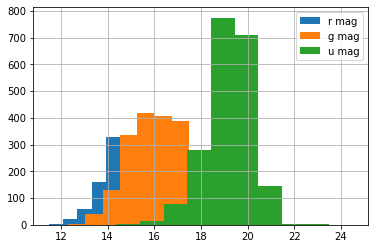

In [8]:
display(df.info())
display(df.describe())
#'rmag', 'gmag', 'umag', 'gal_ID', 'r50', 'r90', 'r_abs', 'g_abs', 'u_abs'
df.rmag.hist(label='r mag')
df.gmag.hist(label='g mag')
df.umag.hist(label='u mag')

plt.legend()

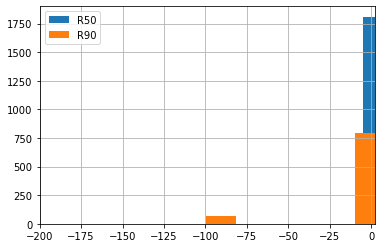

In [9]:
df.r50.hist(label='R50')
df.r90.hist(label='R90')
plt.xlim(-200, 2)

plt.legend()

In [10]:
df_r50 = df[df['r50'] == -1000].copy()
display(df_r50.shape)
df_r50

(0, 16)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early


In [11]:
df_r90 = df[df['r90'] == -1000].copy()
display(df_r90.shape)
df_r90

(0, 16)

,ngc,nk,alg,delg,zred,rmag,gmag,umag,gal_ID,r50,r90,r_abs,g_abs,u_abs,pasiva,early


**Cantidad de pasivas por grupo**

In [12]:
df_pasivas = df.groupby(["ngc"])["early"].sum()

In [13]:
len(df_pasivas.values)

449

In [14]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

,ngc,early
0,1,2
1,2,3


**Match**

In [15]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [16]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [17]:
df_final = df1_sort.join(df_pasivas_sort)

In [18]:
df_final.shape

(449, 18)

In [19]:
df_final.tail()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target,ngc,early
444,458,7,243.981,38.537,0.034782,6.091,26.202,138.779,14.577,1,-20.570,0.103047,0.067340,91.589798,-20.088,Field,458,4
445,459,4,244.410,50.641,0.041362,4.748,25.610,552.432,14.146,1,-21.441,0.099180,0.016282,84.761040,-20.121,Loose,459,3
446,460,5,245.283,13.159,0.034352,3.715,24.912,247.585,14.328,1,-20.778,0.079042,0.028953,55.171383,-19.839,Loose,460,4
447,461,4,247.547,36.247,0.075265,3.671,25.664,383.398,14.479,1,-22.477,0.160493,0.037964,118.280334,-20.026,Field,461,3
448,462,5,250.332,13.424,0.050796,4.130,24.858,268.188,13.764,1,-22.276,0.112063,0.037895,90.346329,-21.427,Loose,462,4


In [20]:
df_final.columns

Index(['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b',
       'flag', 'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target', 'ngc',
       'early'],
      dtype='object')

In [21]:
df_final['early'].iloc[0]/df_final['n_m'].iloc[0]

0.5

In [22]:
frecuencia = []
for i in range(df_final.shape[0]):
    frac = df_final.early.iloc[i]/df_final.n_m.iloc[i]
    frecuencia.append(frac)

In [23]:
len(frecuencia)

449

In [24]:
frecu_03 = list(map(lambda x: round(x, 3), frecuencia))

In [25]:
len(frecu_03)

449

In [26]:
df_final['frac'] = frecu_03

In [27]:
clases = list(set(df_final.Target))
clases = ['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']
#['Node', 'VoiR', 'Loose', 'Field', 'FIl', 'VoiS']

### Fracción de galaxias pasivas sin distinguir por entorno

<AxesSubplot:>

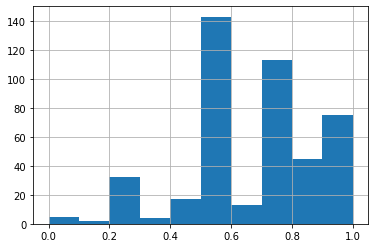

In [28]:
df_final.frac.hist()

In [29]:
clases

['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']

In [30]:
frac_index = list(set(df_final.frac))

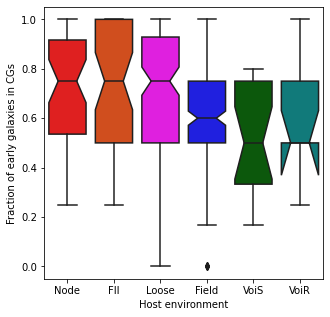

In [31]:
plt.figure(figsize=(5,5))
my_pal = {"Node":"red","FIl":"#EE4000", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"#008B8B"}
sns.boxplot(x=df_final.Target, y=df_final.frac, notch= True, order=[ 
                 'Node',  'FIl', 'Loose', 'Field', 'VoiS', 'VoiR'], palette=my_pal)
#, width=[0.5, 0.2, 1, 0.8, 0.4, 0.3]
plt.ylabel('Fraction of early galaxies in CGs')
plt.xlabel('Host environment')
plt.savefig('early_box_frac.pdf', format ='pdf',  bbox_inches='tight')

In [32]:
df_final[df_final['Target']==clases[0]].shape

(47, 19)

In [33]:
set(df_final.Target)

{'FIl', 'Field', 'Loose', 'Node', 'VoiR', 'VoiS'}

In [34]:
from matplotlib.cbook import boxplot_stats

In [35]:
Node = df_final[df_final['Target']=='Node']
display('Node-frac')
display(boxplot_stats(Node.frac)[0]['med'],
boxplot_stats(Node.frac)[0]['cihi']-boxplot_stats(Node.frac)[0]['med'])

FIl = df_final[df_final['Target']=='FIl']
display('FIl-frac')
display(boxplot_stats(FIl.frac)[0]['med'],
boxplot_stats(FIl.frac)[0]['cihi']-boxplot_stats(FIl.frac)[0]['med'])

Loose = df_final[df_final['Target']=='Loose']
display('Loose-frac')
display(boxplot_stats(Loose.frac)[0]['med'],
boxplot_stats(Loose.frac)[0]['cihi']-boxplot_stats(Loose.frac)[0]['med'])

Field = df_final[df_final['Target']=='Field']
display('Field-frac')
display(boxplot_stats(Field.frac)[0]['med'],
boxplot_stats(Field.frac)[0]['cihi']-boxplot_stats(Field.frac)[0]['med'])

VoiS = df_final[df_final['Target']=='VoiS']
display('VoiS-frac')
display(boxplot_stats(VoiS.frac)[0]['med'],
boxplot_stats(VoiS.frac)[0]['cihi']-boxplot_stats(VoiS.frac)[0]['med'])

VoiR = df_final[df_final['Target']=='VoiR']
display('VoiR-frac')
display(boxplot_stats(VoiR.frac)[0]['med'],
boxplot_stats(VoiR.frac)[0]['cihi']-boxplot_stats(VoiR.frac)[0]['med'])

'Node-frac'

0.75

0.08725206196429558

'FIl-frac'

0.75

0.11574193558159429

'Loose-frac'

0.75

0.05706148614975526

'Field-frac'

0.6

0.028626004581461806

'VoiS-frac'

0.5

0.14639313441893376

'VoiR-frac'

0.5

0.13083333333333336

# Misma figura pero sin considerar submuestras

In [36]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
dfa_c0 = pd.DataFrame(df_c0.frac.values) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden
display(dfa_c0.shape)

df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
dfa_c1 = pd.DataFrame(df_c1.frac.values)


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
dfa_c2 = pd.DataFrame(df_c2.frac.values)


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
dfa_c3 = pd.DataFrame(df_c3.frac.values)


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
dfa_c4 = pd.DataFrame(df_c4.frac.values)


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
dfa_c5 = pd.DataFrame(df_c5.frac.values)

#########################################################################################
Node = pd.DataFrame(Counter(df_c0.frac).values(), index=Counter(df_c0.frac).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_c1.frac).values(), index=Counter(df_c1.frac).keys(), columns=['FIl'])
Loose = pd.DataFrame(Counter(df_c2.frac).values(), index=Counter(df_c2.frac).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_c3.frac).values(), index=Counter(df_c3.frac).keys(), columns=['Field'])
VoiS = pd.DataFrame(Counter(df_c4.frac).values(), index=Counter(df_c4.frac).keys(), columns=['VoiS'])
VoiR = pd.DataFrame(Counter(df_c5.frac).values(), index=Counter(df_c5.frac).keys(), columns=['VoiR'])

#'Node', 'Fil', 'Loose', 'Field', 'VoidS', 'VoidR'
df_12_19 = pd.concat([Node, FIl, Loose, Field, VoiS, VoiR], axis=1)
display(df_12_19.head(2))

(47, 1)

,Node,FIl,Loose,Field,VoiS,VoiR
0.000,NaN,NaN,1.0,4.0,NaN,NaN
0.167,NaN,NaN,NaN,1.0,1.0,NaN


In [37]:
df_12_19.VoiS.shape

(18,)

In [38]:
df_12_19.head(2)

,Node,FIl,Loose,Field,VoiS,VoiR
0.000,NaN,NaN,1.0,4.0,NaN,NaN
0.167,NaN,NaN,NaN,1.0,1.0,NaN


In [39]:
df_12_22 = df_12_19.reset_index().copy()
df_12_22 = df_12_22.rename(columns={'index': 'frac'})
df_12_22 = df_12_22.fillna(0)
df_12_22.head(2)

,frac,Node,FIl,Loose,Field,VoiS,VoiR
0,0.000,0.0,0.0,1.0,4.0,0.0,0.0
1,0.167,0.0,0.0,0.0,1.0,1.0,0.0


https://kodlogs.com/33984/the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous-use-a-any-or-a-all

In [40]:
df_12_22

,frac,Node,FIl,Loose,Field,VoiS,VoiR
0,0.000,0.0,0.0,1.0,4.0,0.0,0.0
1,0.167,0.0,0.0,0.0,1.0,1.0,0.0
2,0.200,0.0,0.0,0.0,2.0,0.0,0.0
3,0.250,4.0,5.0,3.0,13.0,3.0,2.0
4,0.333,0.0,0.0,0.0,2.0,2.0,0.0
5,0.400,0.0,4.0,4.0,8.0,1.0,0.0
6,0.500,8.0,9.0,39.0,50.0,4.0,3.0
7,0.571,1.0,1.0,1.0,2.0,1.0,0.0
8,0.600,2.0,0.0,6.0,15.0,1.0,0.0
9,0.625,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
# Binning of the data based on a condition
df_12_22.loc[df_12_22.frac < 0.25, 'frac'] = 10
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.25, df_12_22.frac < 0.5), 'frac'] = 20
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.5, df_12_22.frac < 0.75), 'frac'] = 30
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.75, df_12_22.frac <= 1.0), 'frac'] = 40
#df_12_22.loc[np.logical_and(df_12_22.frac >= 0.8, df_12_22.frac <= 1.0), 'frac'] = 50
 
# Grouping and couting
df_12_22 = df_12_22.groupby('frac').sum()

In [42]:
df_12_22

,Node,FIl,Loose,Field,VoiS,VoiR
frac,,,,,,
10.0,0.0,0.0,1.0,7.0,1.0,0.0
20.0,4.0,9.0,7.0,23.0,6.0,2.0
30.0,12.0,11.0,47.0,79.0,7.0,4.0
40.0,31.0,26.0,84.0,79.0,6.0,3.0


In [43]:
#bines = ['bin 1', 'bin 2', 'bin 3', 'bin 4', 'bin 5' ]
#bines = ['[0 - 0.2)', '[0.2 - 0.4)', '[0.4 - 0.6)', '[0.6 - 0.8)', '[0.8 - 1]' ]
bines = ['[0 - 0.25)', '[0.25 - 0.5)', '[0.5 - 0.75)', '[0.75 - 1]']

In [44]:
df_12_22['bines'] = bines

In [45]:
df_fracciones_bin =  df_12_22.reset_index().set_index('bines').drop('frac', axis=1)

In [46]:
df_fracciones_bin 

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.0,0.0,1.0,7.0,1.0,0.0
[0.25 - 0.5),4.0,9.0,7.0,23.0,6.0,2.0
[0.5 - 0.75),12.0,11.0,47.0,79.0,7.0,4.0
[0.75 - 1],31.0,26.0,84.0,79.0,6.0,3.0


In [47]:
df_frac_bin_nor_bar = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=1)
df_frac_bin_nor_bar

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.000000,0.000000,0.111111,0.777778,0.111111,0.000000
[0.25 - 0.5),0.078431,0.176471,0.137255,0.450980,0.117647,0.039216
[0.5 - 0.75),0.075000,0.068750,0.293750,0.493750,0.043750,0.025000
[0.75 - 1],0.135371,0.113537,0.366812,0.344978,0.026201,0.013100


In [48]:
df_frac_bin_nor_env = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=0)
df_frac_bin_nor_env

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.000000,0.000000,0.007194,0.037234,0.05,0.000000
[0.25 - 0.5),0.085106,0.195652,0.050360,0.122340,0.30,0.222222
[0.5 - 0.75),0.255319,0.239130,0.338129,0.420213,0.35,0.444444
[0.75 - 1],0.659574,0.565217,0.604317,0.420213,0.30,0.333333


https://www.webucator.com/article/python-color-constants-module/

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

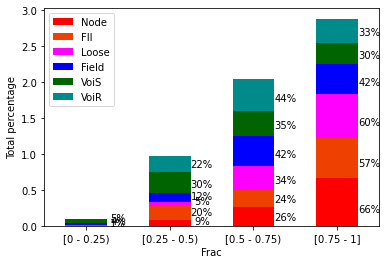

In [49]:
plt.figure(figsize=(5,5))

my_pal = {"Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=True, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/0.79, y + height*0.30), ha='center')
    
plt.savefig('early_df_frac_bin_nor_env.eps',format='eps')

In [50]:
plt.close()

In [51]:
df_fracciones_bin

,Node,FIl,Loose,Field,VoiS,VoiR
bines,,,,,,
[0 - 0.25),0.0,0.0,1.0,7.0,1.0,0.0
[0.25 - 0.5),4.0,9.0,7.0,23.0,6.0,2.0
[0.5 - 0.75),12.0,11.0,47.0,79.0,7.0,4.0
[0.75 - 1],31.0,26.0,84.0,79.0,6.0,3.0


In [52]:
df_frac_bin_nor_env.rename(columns = {"Node":"N","FIl":"F", "Loose":"L", "Field":"NE", "VoiS":"VS", "VoiR":"VR"}, inplace = True)

In [67]:
df_frac_bin_nor_env.to_csv('frac_early.csv', index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

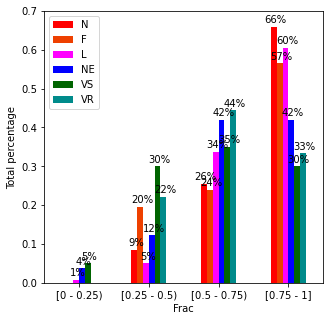

In [58]:
plt.rcParams['figure.figsize'] = 5, 5
plt.figure(figsize=(5,5))

my_pal = {"N":"red","F":"Orange", "L":"Magenta", "NE":"blue", "VS":"Darkgreen", "VR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=False, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
plt.ylim(0, 0.7)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width*0.8, y + height+0.01), ha='center')

plt.legend(loc="upper left")
plt.savefig('early_df_frac_bin_nor_env.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

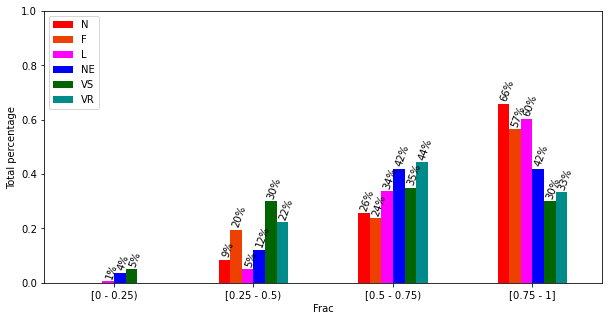

In [60]:
plt.rcParams['figure.figsize'] = 10, 5
plt.figure(figsize=(5,5))

my_pal = {"N":"red","F":"Orange", "L":"Magenta", "NE":"blue", "VS":"Darkgreen", "VR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=False, color=color)

plt.xlabel('Frac')
plt.ylabel('Total percentage')
plt.xticks(rotation=0)
plt.ylim(0, 1)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width*0.8, y + height+0.01), ha='center', rotation=70)

plt.legend(loc="upper left")
plt.savefig('early_df_frac_bin_nor_env.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 360x360 with 0 Axes>

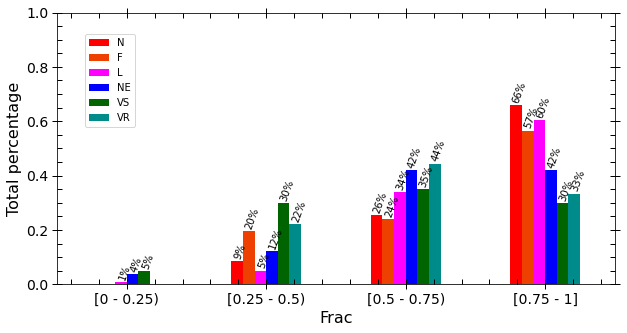

In [66]:
plt.rcParams['figure.figsize'] = 10, 5
plt.figure(figsize=(5,5))

my_pal = {"N":"red","F":"Orange", "L":"Magenta", "NE":"blue", "VS":"Darkgreen", "VR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "#006400", "#008B8B"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=False, color=color)


#ax.tick_params(axis='both', which='minor', direction='in')
# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect

#left=None, bottom=None, right=None, top=None
ax.yaxis.get_ticklocs(minor=True)     # []
ax.xaxis.get_ticklocs(minor=True)     # []

ax.tick_params(bottom = True, labelbottom = True, 
               top = True, labeltop = False,
               right = True, labelright = False, 
               left = True, labelleft = True)

ax.tick_params(bottom=True, top=True, left=True, right=True,
               which='minor', direction='in', 
               length=5, width=1, colors='black',
               grid_color='r', grid_alpha=0.5)

ax.tick_params(which='major', direction='inout', 
               length=10, width=1, colors='black',
               grid_color='r', grid_alpha=0.5)


# Initialize minor ticks
ax.minorticks_on()

# Tamaño
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.xlabel('Frac', fontsize=16)
plt.ylabel('Total percentage', fontsize=16)
plt.xticks(rotation=0)
plt.ylim(0, 1)

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
#ax.xaxis.set_tick_params(which='minor', bottom=True)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width*0.8, y + height+0.01), ha='center', rotation=70)

plt.legend(loc=[0.05, 0.58])
plt.savefig('early_df_frac_bin_nor_env.eps',format='eps')

In [54]:
!pwd

/home/vdaza/compact_goups_Nov/plots/void/tipo_de_void
